# Ideas

- load states.h5
- Search nearest kNN with annoy


In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import annoy
import h5py

from annoy import AnnoyIndex
print("loaded libraries...")

loaded libraries...


## How to build index etc (don't re-run!)

In [2]:
# Load the data
f = h5py.File("s2s_iwslt_ende/states.h5", "r")
cstar = f["cstar"]#f["cstar"]
print(cstar.shape)

(50010, 50, 500)


In [12]:
cstar = f["encoder_out"]

In [5]:
small_copy.close()

In [6]:
# Delete cstar to create a small copy
small_copy = h5py.File("S2S/states_small.h5", "w")
small_copy.create_group('src')
f.copy('src', small_copy['src'])
small_copy.create_group('tgt')
f.copy('tgt', small_copy['tgt'])
small_copy.create_group('attn')
f.copy('attn', small_copy['attn'])
small_copy.close()

In [13]:
# Create the index
t = AnnoyIndex(cstar.shape[2], metric='angular')

In [14]:
# Add samples to index, takes long!
for samplenum, sample in enumerate(cstar):
    for tokennum, tokencontext in enumerate(sample):
        index = cstar.shape[1] * samplenum + tokennum
        t.add_item(index, tokencontext)
        
        if (cstar.shape[1] * samplenum + tokennum) % 1000 == 0:
            print("value #", cstar.shape[1] * samplenum + tokennum)
#     if samplenum > 200:
#         break

value # 0
value # 1000
value # 2000
value # 3000
value # 4000
value # 5000
value # 6000
value # 7000
value # 8000
value # 9000
value # 10000
value # 11000
value # 12000
value # 13000
value # 14000
value # 15000
value # 16000
value # 17000
value # 18000
value # 19000
value # 20000
value # 21000
value # 22000
value # 23000
value # 24000
value # 25000
value # 26000
value # 27000
value # 28000
value # 29000
value # 30000
value # 31000
value # 32000
value # 33000
value # 34000
value # 35000
value # 36000
value # 37000
value # 38000
value # 39000
value # 40000
value # 41000
value # 42000
value # 43000
value # 44000
value # 45000
value # 46000
value # 47000
value # 48000
value # 49000
value # 50000
value # 51000
value # 52000
value # 53000
value # 54000
value # 55000
value # 56000
value # 57000
value # 58000
value # 59000
value # 60000
value # 61000
value # 62000
value # 63000
value # 64000
value # 65000
value # 66000
value # 67000
value # 68000
value # 69000
value # 70000
value # 71000
value

value # 554000
value # 555000
value # 556000
value # 557000
value # 558000
value # 559000
value # 560000
value # 561000
value # 562000
value # 563000
value # 564000
value # 565000
value # 566000
value # 567000
value # 568000
value # 569000
value # 570000
value # 571000
value # 572000
value # 573000
value # 574000
value # 575000
value # 576000
value # 577000
value # 578000
value # 579000
value # 580000
value # 581000
value # 582000
value # 583000
value # 584000
value # 585000
value # 586000
value # 587000
value # 588000
value # 589000
value # 590000
value # 591000
value # 592000
value # 593000
value # 594000
value # 595000
value # 596000
value # 597000
value # 598000
value # 599000
value # 600000
value # 601000
value # 602000
value # 603000
value # 604000
value # 605000
value # 606000
value # 607000
value # 608000
value # 609000
value # 610000
value # 611000
value # 612000
value # 613000
value # 614000
value # 615000
value # 616000
value # 617000
value # 618000
value # 619000
value # 62

value # 1094000
value # 1095000
value # 1096000
value # 1097000
value # 1098000
value # 1099000
value # 1100000


In [15]:
# Build trees
t.build(10)

True

In [16]:
# Save index to file
t.save("encoder.ann")

True

## How to use the search

In [42]:
# Load the index from file
u = AnnoyIndex(500)
u.load("S2S/decoder.ann")

True

In [44]:
# Load the file with states etc
f = h5py.File("S2S/large/states_small.h5", "r")

In [45]:
# Define loader for dictionary and load them
def load_dict(fname):
    ix2w = {}
    with open(fname, "r") as f:
        for l in f:
            cline = l.split()
            ix2w[int(cline[0])] = cline[1]
    ix2w[0] = "<unk>"
    return ix2w

In [46]:
src_dict = load_dict("S2S/src.dict")
tgt_dict = load_dict("S2S/tgt.dict")

In [102]:
# Test functionality by giving a point as input
def get_closest(testpoint, k=5, annoy=True):
    if annoy:
        I, D = u.get_nns_by_vector(testpoint.squeeze(), 
                                    k,  
                                    search_k=50000, 
                                    include_distances=True)
        return D, I
    else:
        D, I = index.search(testpoint, k) 
        return D, I

        
testpoint = np.array(cstar[0,0:1], dtype="float32")


In [149]:
# annoy
%time D, I = get_closest(testpoint, 25, annoy=True)
print(I)

CPU times: user 36.5 ms, sys: 1.88 ms, total: 38.3 ms
Wall time: 38.7 ms
[147047, 969023, 310957, 571851, 933596, 950993, 431290, 249060, 746382, 855674, 928770, 682402, 662405, 247146, 912924, 662406, 961327, 238563, 928760, 664748, 845862, 682406, 144397, 346712, 518341]


In [150]:
# faiss
%time D, I = get_closest(testpoint, 25, annoy=False)
print(I)

CPU times: user 315 ms, sys: 38.9 ms, total: 354 ms
Wall time: 308 ms
[[ 174974  311579 1056559  238261  308952  323676   48425 1062276  538734
   739660   60564   41441  388156  143277  583175  668534  117867  777543
   633615  345426  456997  401451  114418   23381       3]]


In [48]:
# Index is stretched out, need to find src/tgt index
def convert_result_to_correct_index(oldix):
    return oldix // 55, oldix % 55
convert_result_to_correct_index(101)

(1, 46)

In [49]:
# Transform tokens, ignore padding (1)
def ix2text(array, vocab, highlight=-1):
    tokens = []
    for ix, t in enumerate(array):
        if ix == highlight:
            tokens.append("___" + vocab[t] + "___")
        elif t != 1:
            tokens.append(vocab[t])
    return " ".join(tokens)


In [50]:
# Compute length of a sentence when ignoring padding
def compute_sent_length(array):
    return np.sum([1 for t in array if t != 1])

In [51]:
# Convert a result for an index
def convert_result(ix):
    sentIx, tokIx = convert_result_to_correct_index(ix)
    # Get raw list of tokens
    src_in = f['src']['src'][sentIx]
    tgt_in = f['tgt']['tgt'][sentIx]
    # Convert to text
    src = ix2text(src_in, src_dict)
    tgt = ix2text(tgt_in, tgt_dict, tokIx)
    attn = f['attn']['attn'][sentIx]
    src_len = compute_sent_length(src_in)
    tgt_len = compute_sent_length(tgt_in)
    attn = attn[:tgt_len,:src_len]
    print(src)
    print(tgt)
    return src, tgt, attn
src, tgt, attn = convert_result(123)

&quot; Two soldiers came up to me and told me that if I refuse to sleep with them , they will kill me . They beat me and ripped my clothes .
<s> Also kam ich nach Südafrika " , erzählte eine Frau namens Grace ___dem___ Human Rights <unk> Gerry Simpson , der die Probleme der <unk> Flüchtlinge in Südafrika untersucht .


### Case study

We have word number 500, and want to know which it was closest to

In [52]:
investigated_num = 11

In [53]:
curr_res = get_closest(investigated_num,5,True)
print(curr_res)

[680582, 627181, 997046, 120646, 899980]


In [54]:
# First we print what it was
_ = convert_result(investigated_num)

It is not acceptable that , with the help of the national bureaucracies , Parliament &apos;s legislative prerogative should be made null and void by means of implementing provisions whose content , purpose and extent are not laid down in advance .
<s> Es geht nicht an , dass über <unk> , deren ___Inhalt___ , Zweck und Ausmaß vorher nicht bestimmt ist , zusammen mit den nationalen Bürokratien das <unk> des Europäischen Parlaments ausgehebelt wird .


In [55]:
# Then, the closest one's
for r in curr_res:
    _ = convert_result(r)
    print()

We have addressed the Internet pharmacy issue .
<s> Wir haben das Problem der <unk> aufgegriffen . ___<blank>___

The independence of a state is not real as long as the United Nations Security Council does not accept it .
<s> Die Unabhängigkeit eines Staates ist ohne die Anerkennung durch den Sicherheitsrat der Vereinten Nationen nicht ___echt___ .

Aiguille du Midi is also where you can start an almost endless lift serviced ski and snowboarding run , one of 21 kilometers long , the longest in the world !
<s> Diese <unk> ist die h ___�___ chste in ganz Europa ! <unk> du Midi ist also der Ort , wo Sie am besten starten und wo Sie die riesige Auswahl an Liften und Pisten genie � en k � nnen .

. I shall begin by responding to Mr Posselt and I shall not speak too quickly .
<s> Ich werde mit der Antwort an Herrn Posselt beginnen und versuchen , nicht so schnell zu sprechen . ___<blank>___

Secondly , we voted against all the amendments in paragraph 50 , because the Bene ? decrees are a tra

### FAISS

In [3]:
import faiss
cstar.shape

Failed to load GPU Faiss: No module named 'swigfaiss_gpu'
Faiss falling back to CPU-only.


(50010, 50, 500)

Use a quantizer

In [140]:
index = faiss.IndexPQ (cstar.shape[2], 20, 8)        # Create the index

In [141]:
index.train(np.array(cstar[0:2000].reshape(-1, cstar.shape[2]), dtype="float32"))

In [142]:
stepsize = 100 # How many to add at once
for ix in range(2000, cstar.shape[0]-stepsize, stepsize):
    cdata = np.array(cstar[ix:ix+stepsize].reshape(-1, 
                                                   cstar.shape[2]), 
                     dtype="float32")
    index.add(cdata)

In [143]:
index.nprobe = 10

IP search

In [24]:
cstar = f["decoder_out"]
# cstar = f["cstar"]

In [25]:
d = cstar.shape[2]
# index = faiss.IndexFlatIP(d)
index = faiss.IndexFlatL2(d) 

In [26]:
stepsize = 100 # How many to add at once
for ix in range(0, cstar.shape[0]-stepsize, stepsize):
    cdata = np.array(cstar[ix:ix+stepsize].reshape(-1, 
                                                   cstar.shape[2]), 
                     dtype="float32")
    index.add(cdata)
    if ix % 5000 == 0:
        print(ix)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000


Safe and Load

In [27]:
faiss.write_index(index, 's2s_iwslt_ende/decoder_l2.faiss')

In [37]:
index = faiss.read_index('decoder.faiss')

In [16]:
del index

Test

In [144]:
testpoint = np.array(cstar[0][0:1], dtype="float32")
print(testpoint.shape)

(1, 500)


In [145]:
%time D, I = index.search (testpoint, 5) 
print(D, I)

CPU times: user 24.2 ms, sys: 5.72 ms, total: 29.9 ms
Wall time: 21.4 ms
[[ 0.62567312  0.63925707  0.6418404   0.64386076  0.64680231]] [[900082  25465 977474 487581 900081]]


In [148]:
% time D, I = index.search(testpoint, 5)   
print(D, I)

CPU times: user 583 ms, sys: 53.2 ms, total: 636 ms
Wall time: 463 ms
[[ 1.29864526  1.28903401  1.22845101  1.22558022  1.21825838]] [[ 174974  311579 1056559  238261  308952]]


### Test Clustering

In [18]:
cstar = f["decoder_out"]
cstar.shape[-1]

500

In [19]:
ncentroids = 20
niter = 20
d = cstar.shape[-1]

In [33]:
kmeans = faiss.Kmeans(d, ncentroids, niter, verbose=True)

In [35]:
x = np.array(cstar[:].reshape((-1, d)), dtype="float32")
x.shape

(2500500, 500)

In [36]:
kmeans.train(x)

167185.05

In [38]:
faiss.write_index(kmeans.index, 's2s/kmeans_decoder.faiss')

In [39]:
D, I = kmeans.index.search(x, 1)

In [45]:
D = D.reshape(-1, 50)
I = I.reshape(-1, 50)

In [100]:
import codecs
ix2w = {}
with codecs.open("s2s/tgt.dict", 'r', 'utf-8') as g:
    for l in g:
        w = l.split()
        ix2w[int(w[0])] = w[1]
ix2w[0] = "<unk>"

In [103]:
def get_example(ix, dic):
    for cluster, src in zip(I[ix], f['tgt'][ix]):
        if src != 1:
            print("{}|{}".format(dic[src],cluster), end=" ")

In [104]:
for i in [150, 250, 350, 500, 1000, 2000, 45000]:
    get_example(i, ix2w)
    print("")
    print("--")

<s>|0 and|0 20|13 years|13 later|13 ,|0 miraculously|13 ,|0 we|9 collaborated|13 with|0 a|4 company|13 from|7 mali|13 ,|0 the|4 <unk>|4 <unk>|4 troupe|13 of|4 <unk>|13 ,|0 where|0 we|9 made|0 a|4 piece|13 about|0 a|4 tall|7 giraffe|5 .|2 </s>|16 
--
<s>|0 these|9 are|0 chemical|7 clocks|13 ,|0 and|0 they|9 &apos;re|0 found|13 in|0 every|4 known|4 being|13 that|9 has|0 two|13 or|0 more|13 cells|13 and|0 in|0 some|4 that|9 only|4 have|0 one|4 cell|5 .|2 </s>|16 
--
<s>|0 it|9 lists|0 already|13 1,000|4 entities|13 that|9 are|0 offering|0 debt|13 and|4 equity|13 for|0 social|4 enterprise|5 .|2 </s>|16 
--
<s>|0 it|9 really|9 makes|0 you|9 think|13 ,|0 we|9 &apos;d|9 love|0 to|9 know|0 what|0 &apos;s|0 going|13 on|13 inside|0 their|4 brain|5 .|2 </s>|16 
--
<s>|0 small|4 country|13 ,|0 not|0 so|0 rich|5 .|0 president|9 said|13 he|9 &apos;d|9 do|0 it|13 ,|0 and|0 guess|0 what|17 ?|2 </s>|16 
--
<s>|0 you|9 &apos;ll|9 have|0 <unk>|4 vitality|13 and|0 energy|5 .|2 </s>|16 
--
<s>|0 the|4 poli

In [74]:
from collections import Counter

In [79]:
from_to = Counter()
for ex, txt in zip(I, f['tgt']):
    prev = -1
    for ex_ix in range(len(ex)):
        if txt[ex_ix] != 1 and prev != -1:
            from_to[(prev, ex[ex_ix])] +=1
        prev = ex[ex_ix]

In [94]:
heatmap_source = []
for i in range(20):
    clist = []
    for j in range(20):
        cval = from_to[(i,j)]
        if cval > 0:
            cval = cval
#             cval = np.log(cval)
        clist.append(cval)
    heatmap_source.append(clist)
heatmap_source = np.array(heatmap_source)

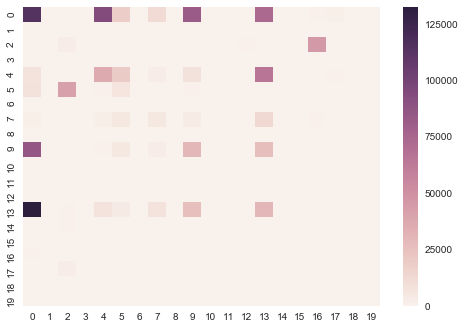

In [95]:
sns.heatmap(heatmap_source)